<a href="https://colab.research.google.com/github/robitussin/CCINSYSL_EXAM/blob/main/exam_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam 💙 💛

Instructions ❗️❗️

❌ Do not remove or modify the notebook sections, subsections, exam questions or any text in this python notebook

✔️ Put your answer in the designated cells below each question

## Linear Regression

In [1312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

In [1313]:
df = load_diabetes(as_frame=True, scaled=False)
df = df['frame']

In [1314]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [1315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


1. Display the correlation of all features in the dataset using the `.corr()` function. `(5 points)`

In [1316]:
# put your answer here
correlation = df.corr()
print(correlation)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

2. Using `sns.heatmap()`, draw a heatmap of the correlation of all features of the dataset. `(5 points)`

 - Set the `annot` parameter to **True**

<Axes: >

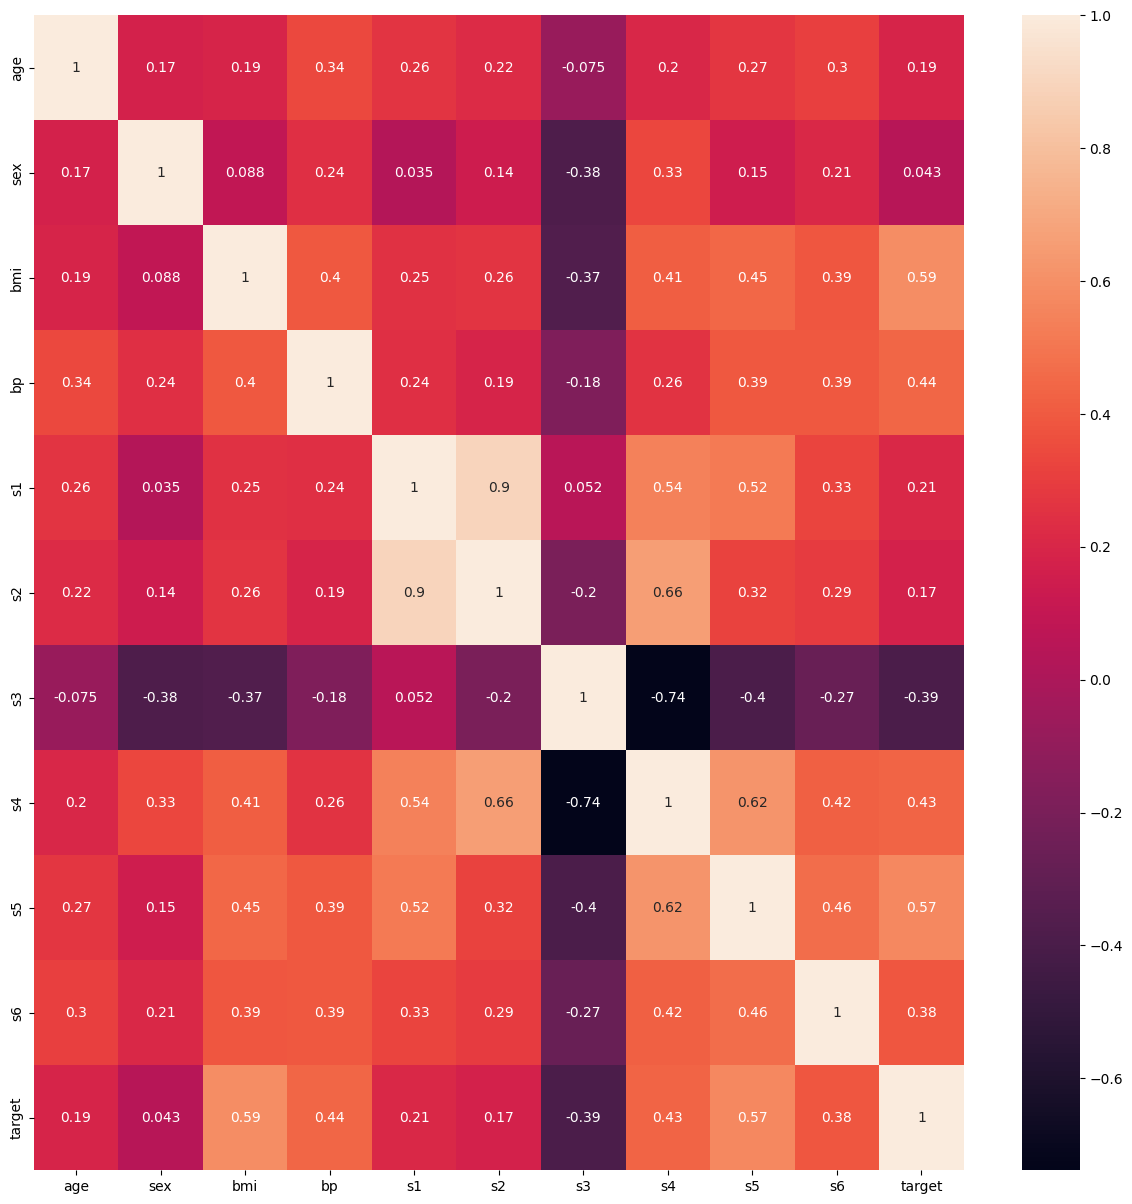

In [1317]:
plt.figure(figsize=(15, 15))
# put your answer here
sns.heatmap(correlation, annot = True)

3. Split the data set into a training and test set. `(5 points)`

In [1318]:
# put your answer here
X = df.drop(columns=['target']).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=49)

print('X_Train:', X_train.shape)
print('y_Train:', y_train.shape)
print('X_Test:', X_test.shape)
print('y_Train:', y_test.shape)

X_Train: (375, 10)
y_Train: (375,)
X_Test: (67, 10)
y_Train: (67,)


4. Use the `the MinMaxScaler()` method to scale down the training and test set. `(5 points)`

In [1319]:
# put your answer here
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. Create a new instance of the `LinearRegression` class. `(5 points)`

In [1320]:
# put your answer here
e_model = LinearRegression()

6. Use the `fit()` method to train the linear regression model using the scaled training set. `(5 points)`

In [1321]:
# put your answer here
e_model.fit(X_train_scaled, y_train)

LinearRegression()

7. Use the `predict()` method to make predictions using the scaled test set. `(5 points)`

In [1322]:
# put your answer here
y_pred = e_model.predict(X_test_scaled)

8. Display the intercept, slope and $R^2$. `(5 points)`

In [1323]:
# put your answer here
r2 = r2_score(y_test, y_pred)
print(f"R2 Score : {r2}")

R2 Score : 0.6047686740301099


9. Write a `normal_equation()` function that will return the intercept and coefficients/slopes. `(5 points)`

In [1324]:
# put your answer here
def normal_equation(X, y):

    ones = np.ones((X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    result = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return result, result[0], result[1:]

10. Call the `normal_equation()` function and pass the scaled training set. Display the intercept and slopes. `(5 points)`

In [1325]:
# Put your answer here
result, b, m = normal_equation(X, y)

print("Result: ", result)
print("Intercept:", b)
print("Slopes:", m)

Result:  [-3.34567139e+02 -3.63612242e-02 -2.28596481e+01  5.60296209e+00
  1.11680799e+00 -1.08999633e+00  7.46450456e-01  3.72004715e-01
  6.53383194e+00  6.84831250e+01  2.80116989e-01]
Intercept: -334.56713852472603
Slopes: [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
